# Data Mining and Discovery

Libraries

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from keras.utils import np_utils

Dataset

In [16]:
# Read the csv data
dataset = pd.read_csv("census+income/adult_data.csv")
dataset.head()

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Data Analysis

In [13]:
# Summary statistics
dataset.describe()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Correlation between columns
print(dataset.corr()["Age"].abs().sort_values(ascending=False))

Age               1.000000
Capital_Gain      0.077674
Final_Weight      0.076646
Hours_Per_Week    0.068756
Capital_Loss      0.057775
Education_Num     0.036527
Name: Age, dtype: float64


C:\Users\Hammad\AppData\Local\Temp\ipykernel_1096\770250581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataset.corr()["Age"].abs().sort_values(ascending=False))


In [16]:
# Check for missing values
dataset.isnull().sum()  

Age               0
Work_Class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
dtype: int64

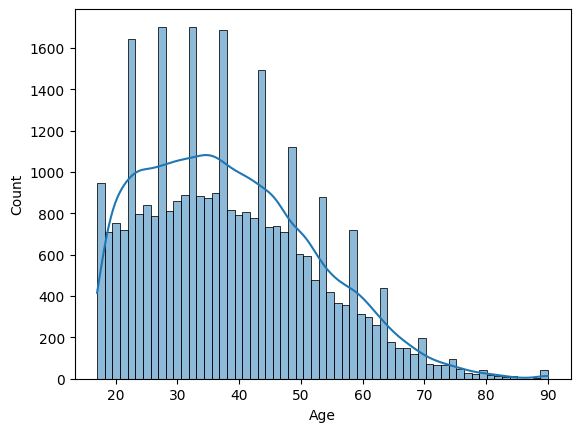

In [18]:
# Age Distribution
sns.histplot(dataset['Age'], kde=True)  
plt.show()

C:\Users\Hammad\AppData\Local\Temp\ipykernel_1096\767181936.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


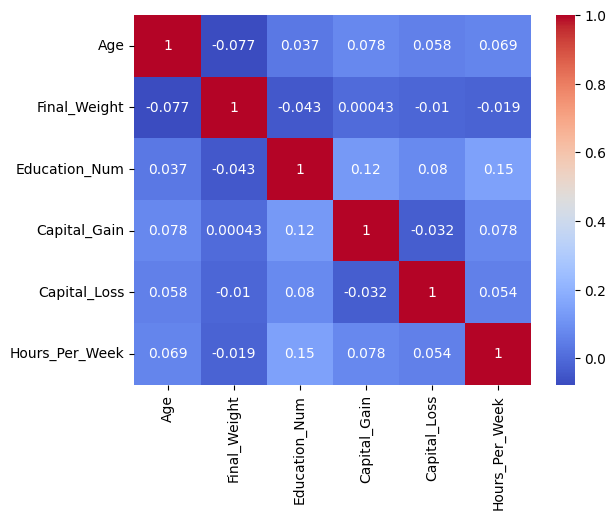

In [19]:
# Correlation Matrix
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

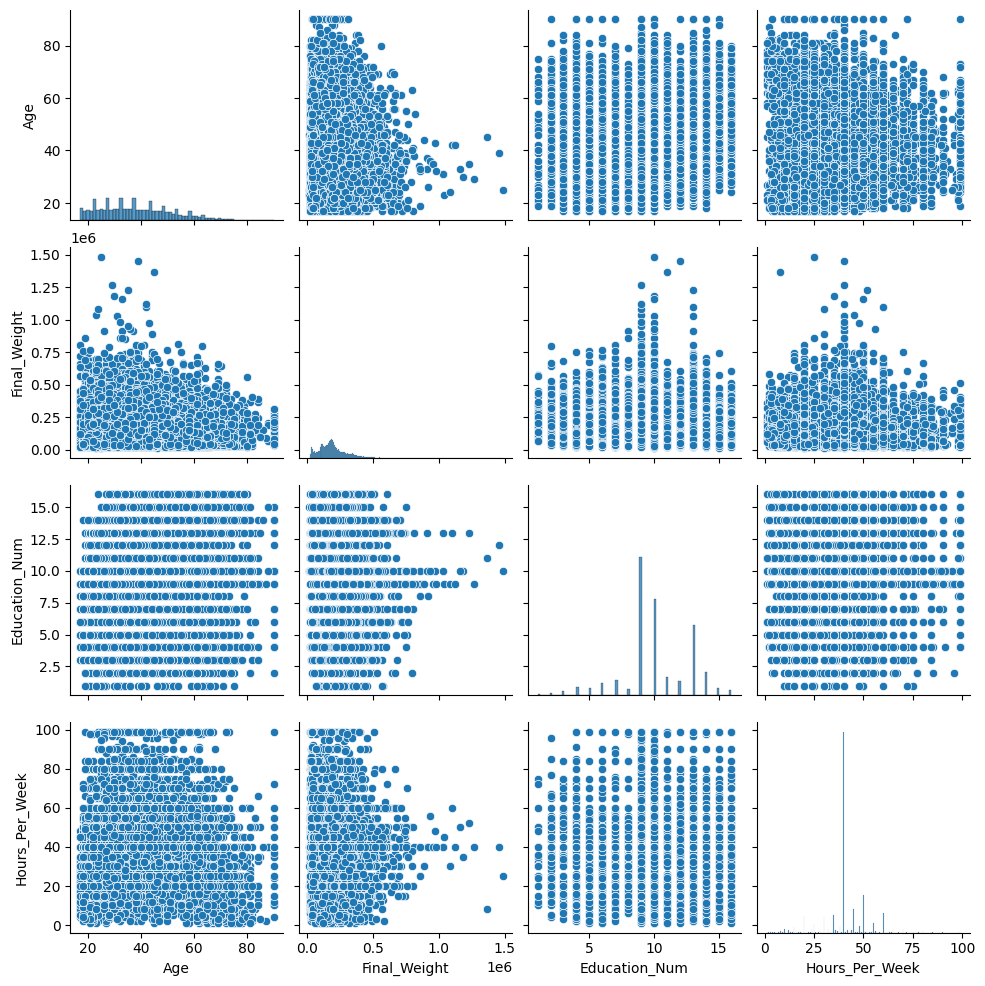

In [20]:
# Scatter Plot
sns.pairplot(dataset, vars=['Age', 'Final_Weight', 'Education_Num', 'Hours_Per_Week'])
plt.show()

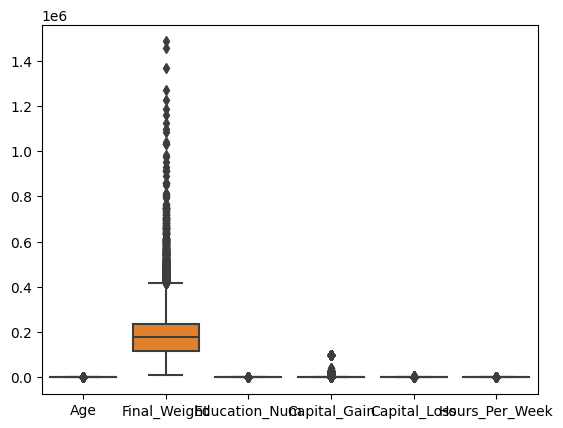

In [21]:
# Identify Outliers
sns.boxplot(data=dataset)
plt.show()

### Topic 1: Linear Regression

Data Preprocessing

In [25]:
# Categorical Columns
categorical_columns = dataset.select_dtypes(include='object').columns
categorical_columns

Index(['Work_Class', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_Country'],
      dtype='object')

In [26]:
# Categorical Columns with their unique values

categorical_columns_uni = []
for column in dataset[categorical_columns]:
    unique_vals = np.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values <= 14:
        categorical_columns_uni.append(column)
        print('The number of values  for feature ** {} ** : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature *** {} *** : {}'.format(column, nr_values))


print(categorical_columns_uni)

The number of values  for feature ** Work_Class ** : 9 -- [' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
The number of values  for feature *** Education *** : 16
The number of values  for feature ** Marital_Status ** : 7 -- [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
The number of values  for feature *** Occupation *** : 15
The number of values  for feature ** Relationship ** : 6 -- [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
The number of values  for feature ** Race ** : 5 -- [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
The number of values  for feature ** Sex ** : 2 -- [' Female' ' Male']
The number of values  for feature *** Native_Country *** : 42
['Work_Class', 'Marital_Status', 'Relationship', 'Race', 'Sex']


In [46]:
# One hot Encoding (Categorical Columns to Numeric Columns)
# Only using categorical_columns_uni for Encoding

dataset1 = dataset.copy()
encoder = OneHotEncoder(sparse=False)  # Create the encoder
encoded_data = encoder.fit_transform(dataset1[categorical_columns_uni])  # Encode the categorical columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())  # Create a DataFrame
dataset1 = dataset1.drop(categorical_columns_uni, axis=1)  # Remove from original DataFrame
dataset1 = pd.concat([dataset1, encoded_df], axis=1)  # Merge with encoded DataFrame
dataset1


c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Final_Weight,Education,Education_Num,Occupation,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Work_Class_ ?,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,39,77516,Bachelors,13,Adm-clerical,2174,0,40,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,83311,Bachelors,13,Exec-managerial,0,0,13,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,215646,HS-grad,9,Handlers-cleaners,0,0,40,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,234721,11th,7,Handlers-cleaners,0,0,40,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,338409,Bachelors,13,Prof-specialty,0,0,40,Cuba,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Tech-support,0,0,38,United-States,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32557,40,154374,HS-grad,9,Machine-op-inspct,0,0,40,United-States,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32558,58,151910,HS-grad,9,Adm-clerical,0,0,40,United-States,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32559,22,201490,HS-grad,9,Adm-clerical,0,0,20,United-States,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [179]:
# Remove Categorical Features from dataset for Regression
dataset2 = dataset1.copy()
dataset2 = dataset2.drop(dataset2.select_dtypes(include='object').columns, axis=1)
dataset2.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [180]:
# Datseet to X and y

X = dataset2.drop(['Education_Num'], axis=1)
y = dataset2['Education_Num']

In [181]:
# Standard Scaler (not beteen 1 and -1) 
sc = StandardScaler()
XS = sc.fit_transform(X)
XS

array([[ 0.03067056, -1.06361075,  0.1484529 , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.83710898, -1.008707  , -0.14592048, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-0.04264203,  0.2450785 , -0.14592048, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965, -0.35877741, -0.14592048, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.21564337,  0.11095988, -0.14592048, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.92989258,  1.88842434, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

In [182]:
# Test train Split
# 80% for training and 20% for testig

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(26048, 34) (26048,)


Model Training

In [183]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [184]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 5.85
R-squared: 0.11


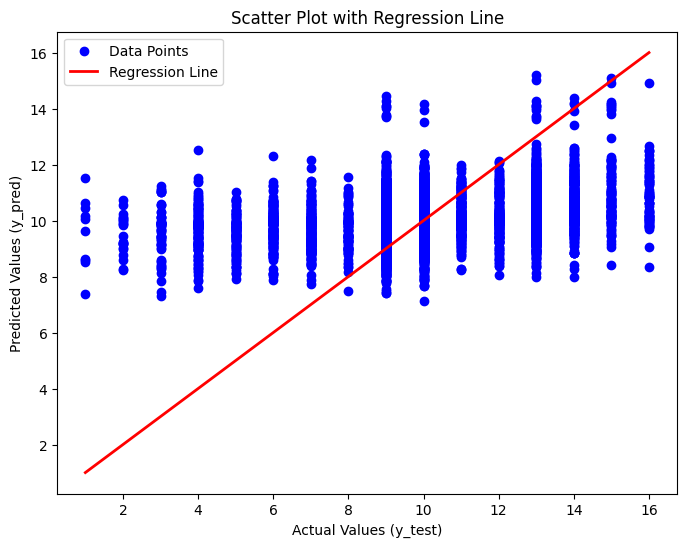

In [188]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()


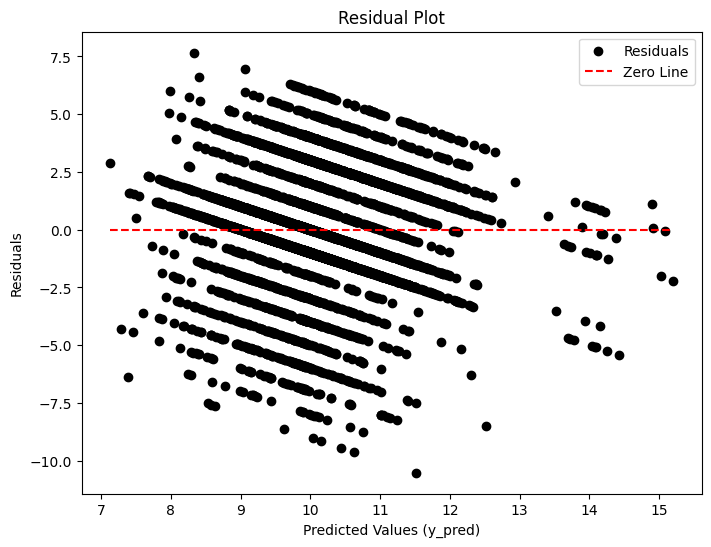

In [189]:

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='black', label='Residuals')
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--', label='Zero Line')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


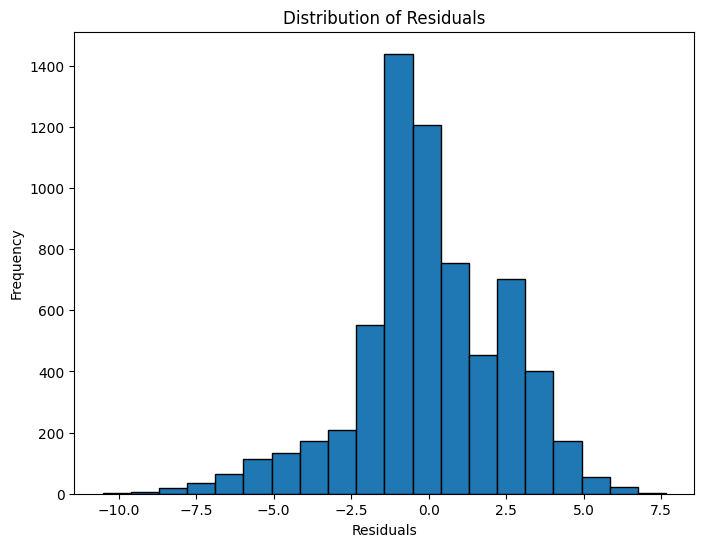

In [190]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


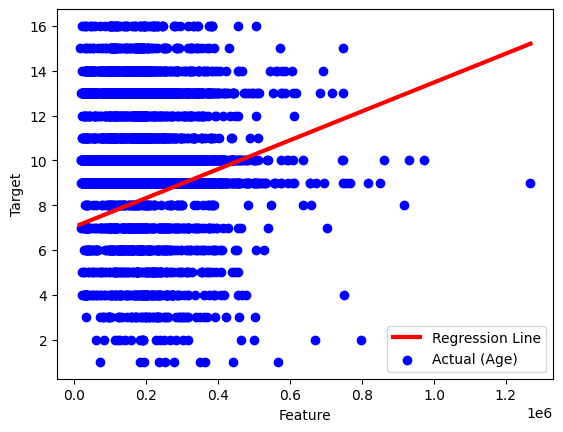

In [191]:
# Linear Regression Plot (Scatter Plot and line plot)

plt.plot([min(X_test['Final_Weight']), max(X_test['Final_Weight']) ], [min(y_pred), max(y_pred)], color='red', linewidth=3, label='Regression Line')

# Plot the regression line
plt.scatter(X_test['Final_Weight'], y_test, color='blue', label='Actual (Age)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Topic 2: Classification (MLP)

In [200]:
# One hot Encoding (Categorical Columns to Numeric Columns)
# Only using categorical_columns_uni for Encoding

dataset3 = dataset.copy()
dataset3_cat_col = dataset3.select_dtypes(include='object').columns
print(dataset3_cat_col)
dataset3_cat_col = dataset3_cat_col.drop("Work_Class")
print(dataset3_cat_col)

Index(['Work_Class', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_Country'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native_Country'],
      dtype='object')


In [201]:
# Categorical Columns with their unique values

categorical_columns_uni3 = []
for column in dataset[dataset3_cat_col]:
    unique_vals = np.unique(dataset[column])
    nr_values = len(unique_vals)
    if nr_values <= 16:
        categorical_columns_uni3.append(column)
        print('The number of values  for feature ** {} ** : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values  for feature *** {} *** : {}'.format(column, nr_values))


print(categorical_columns_uni3)

The number of values  for feature ** Education ** : 16 -- [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
The number of values  for feature ** Marital_Status ** : 7 -- [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
The number of values  for feature ** Occupation ** : 15 -- [' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
The number of values  for feature ** Relationship ** : 6 -- [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
The number of values  for feature ** Race ** : 5 -- [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Oth

In [202]:
encoder = OneHotEncoder(sparse=False)  # Create the encoder
encoded_data = encoder.fit_transform(dataset3[categorical_columns_uni3])  # Encode the categorical columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())  # Create a DataFrame
dataset3 = dataset3.drop(categorical_columns_uni3, axis=1)  # Remove from original DataFrame
dataset3 = pd.concat([dataset3, encoded_df], axis=1)  # Merge with encoded DataFrame
dataset3

c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Work_Class,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Education_ 10th,Education_ 11th,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,39,State-gov,77516,13,2174,0,40,United-States,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,Self-emp-not-inc,83311,13,0,0,13,United-States,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,Private,215646,9,0,0,40,United-States,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,Private,234721,7,0,0,40,United-States,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,Private,338409,13,0,0,40,Cuba,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,0,0,38,United-States,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32557,40,Private,154374,9,0,0,40,United-States,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32558,58,Private,151910,9,0,0,40,United-States,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
32559,22,Private,201490,9,0,0,20,United-States,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [206]:
X = dataset3.drop(['Work_Class', 'Native_Country'], axis=1)
y = dataset3['Work_Class']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [209]:
y_pred = model.predict(X_test)

In [210]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7029018885306311


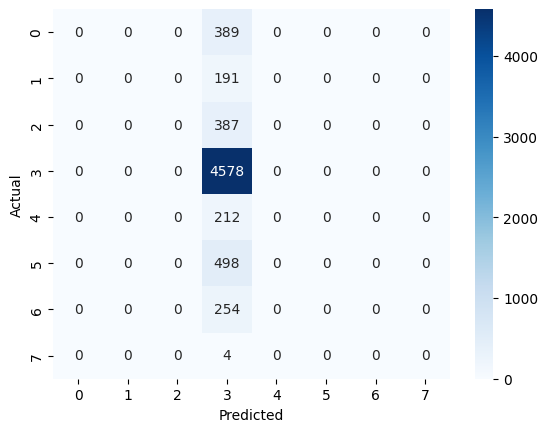

In [211]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Customize as needed
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC Curve with Multi Label Classification

In [251]:
# y class shifted into 150*3 matrix (this is must for multi label prediction in Keras)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y) #for sparse_categorical
y_cat = np_utils.to_categorical(encoded_Y) #for categorical

In [266]:
y.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
y_train.shape

(26048, 9)

In [268]:
n_classes = y_train.shape[1]

model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

model.fit(X_train, y_train)

c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [289]:
y_prob = model.predict_proba(X_test)

In [275]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


C:\Users\Hammad\AppData\Local\Temp\ipykernel_10832\3852958451.py:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


<Figure size 800x800 with 0 Axes>

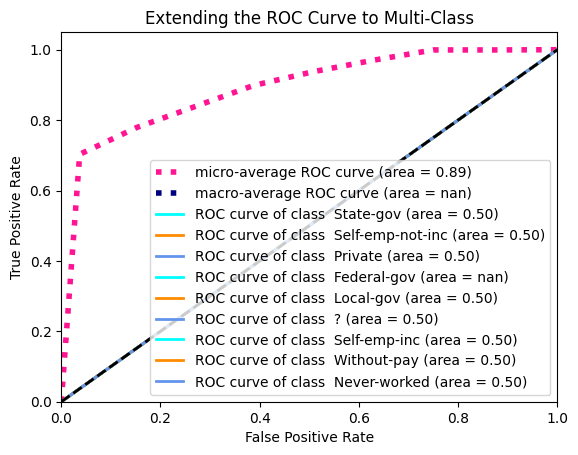

In [278]:
# Process of plotting roc-auc curve belonging to all classes.

n_class_labels = y.unique()
lw = 2 # line_width

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 8))
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class %s (area = {1:0.2f})'
             ''.format(i, roc_auc[i]) %n_class_labels[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()